# Problem Statement:
**You are the data scientist at a telecom company named “Neo” whose customers
are churning out to its competitors. You have to analyze the data of your
company and find insights and stop your customers from churning out to other
telecom companies.
Customer_churn Dataset:
The details regarding this ‘customer_churn’ dataset are present in the data
dictionary

**Lab Environment: Anaconda
Domain: Telecom
Tasks to be performed:

**1. Data Manipulation:
● Extract the 5th column and store it in ‘customer_5’
● Extract the 15th column and store it in ‘customer_15’
● Extract all the male senior citizens whose payment method is electronic
check and store the result in ‘senior_male_electronic’
● Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than 100 and store the result in ‘customer_total_tenure’
● Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’
● Extract 333 random records from the customer_churndataframe and store
the result in ‘customer_333’
● Get the count of different levels from the ‘Churn’ column

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv("customer_churn (4).csv")

In [11]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# A) Data Manipulation:

a. Extract the 5th column & store it in ‘customer_5’

In [14]:
customer_5 = df.iloc[:,4]
print(customer_5)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object


In [15]:
customer_5 = df.loc[:,["Dependents"]]

In [17]:
print(customer_5)

     Dependents
0            No
1            No
2            No
3            No
4            No
...         ...
7038        Yes
7039        Yes
7040        Yes
7041         No
7042         No

[7043 rows x 1 columns]


In [18]:
customer_5 = df.Dependents

In [19]:
print(customer_5)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object


b. Extract the 15th column & store it in ‘customer_15’

In [20]:
customer_15 = df.iloc[:,14]
print(customer_15)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object


In [22]:
customer_15 = df.loc[:,["StreamingMovies"]]
print(customer_15)

     StreamingMovies
0                 No
1                 No
2                 No
3                 No
4                 No
...              ...
7038             Yes
7039             Yes
7040              No
7041              No
7042             Yes

[7043 rows x 1 columns]


In [23]:
customer_15 = df.StreamingMovies

In [24]:
print(customer_15)

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object


c. Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’

In [25]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [27]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [28]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [29]:
senior_male_electronic = df[(df["gender"]=="Male") & (df["SeniorCitizen"]==1) & (df["PaymentMethod"]=="Electronic check")]

In [30]:
senior_male_electronic

customerID gender  SeniorCitizen Partner Dependents  tenure  \
20    8779-QRDMV   Male              1      No         No       1   
55    1658-BYGOY   Male              1      No         No      18   
57    5067-XJQFU   Male              1     Yes        Yes      66   
78    0191-ZHSKZ   Male              1      No         No      30   
91    2424-WVHPL   Male              1      No         No       1   
...          ...    ...            ...     ...        ...     ...   
6837  6229-LSCKB   Male              1      No         No       6   
6894  1400-MMYXY   Male              1     Yes         No       3   
6914  7142-HVGBG   Male              1     Yes         No      43   
6967  8739-WWKDU   Male              1      No         No      25   
7032  6894-LFHLY   Male              1      No         No       1   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
20             No  No phone service             DSL             No  ...   
55            Yes               Yes     Fiber optic             No  ...   
57            Yes               Yes     Fiber optic             No  ...   
78            Yes                No             DSL            Yes  ...   
91            Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
6837          Yes                No     Fiber optic             No  ...   
6894          Yes               Yes     Fiber optic             No  ...   
6914          Yes               Yes     Fiber optic             No  ...   
6967          Yes               Yes     Fiber optic             No  ...   
7032          Yes               Yes     Fiber optic             No  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
20                Yes          No          No             Yes  Month-to-month   
55                 No          No         Yes             Yes  Month-to-month   
57                Yes         Yes         Yes             Yes        One year   
78                 No          No         Yes             Yes  Month-to-month   
91                 No         Yes          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
6837               No          No         Yes              No  Month-to-month   
6894              Yes          No         Yes             Yes  Month-to-month   
6914              Yes          No         Yes             Yes  Month-to-month   
6967               No          No         Yes              No  Month-to-month   
7032               No          No          No              No  Month-to-month   

     PaperlessBilling     PaymentMethod MonthlyCharges  TotalCharges Churn  
20                Yes  Electronic check          39.65         39.65   Yes  
55                Yes  Electronic check          95.45       1752.55   Yes  
57                Yes  Electronic check         108.45       7076.35    No  
78                Yes  Electronic check          74.75        2111.3    No  
91                 No  Electronic check          74.70          74.7    No  
...               ...               ...            ...           ...   ...  
6837              Yes  Electronic check          79.70         497.6    No  
6894              Yes  Electronic check         105.90        334.65   Yes  
6914              Yes  Electronic check         103.00        4414.3   Yes  
6967              Yes  Electronic check          89.50       2196.15   Yes  
7032              Yes  Electronic check          75.75         75.75   Yes  

[298 rows x 21 columns]

d. Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

In [32]:
customer_total_tenure = df[(df["tenure"]>70) | (df["MonthlyCharges"]>100)]

In [33]:
customer_total_tenure

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
8     7892-POOKP  Female              0     Yes         No      28   
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    Male              0      No         No      49   
14    5129-JLPIS    Male              0      No         No      25   
15    3655-SNQYZ  Female              0     Yes        Yes      69   
...          ...     ...            ...     ...        ...     ...   
7023  1035-IPQPU  Female              1     Yes         No      63   
7034  0639-TSIQW  Female              0      No         No      67   
7037  2569-WGERO  Female              0      No         No      72   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
8             Yes           Yes     Fiber optic                   No  ...   
12            Yes           Yes     Fiber optic                   No  ...   
13            Yes           Yes     Fiber optic                   No  ...   
14            Yes            No     Fiber optic                  Yes  ...   
15            Yes           Yes     Fiber optic                  Yes  ...   
...           ...           ...             ...                  ...  ...   
7023          Yes           Yes     Fiber optic                   No  ...   
7034          Yes           Yes     Fiber optic                  Yes  ...   
7037          Yes            No              No  No internet service  ...   
7039          Yes           Yes     Fiber optic                   No  ...   
7042          Yes            No     Fiber optic                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
8                     Yes                  Yes                  Yes   
12                    Yes                   No                  Yes   
13                    Yes                   No                  Yes   
14                    Yes                  Yes                  Yes   
15                    Yes                  Yes                  Yes   
...                   ...                  ...                  ...   
7023                  Yes                   No                  Yes   
7034                  Yes                   No                  Yes   
7037  No internet service  No internet service  No internet service   
7039                  Yes                   No                  Yes   
7042                  Yes                  Yes                  Yes   

          StreamingMovies        Contract PaperlessBilling  \
8                     Yes  Month-to-month              Yes   
12                    Yes        One year               No   
13                    Yes  Month-to-month              Yes   
14                    Yes  Month-to-month              Yes   
15                    Yes        Two year               No   
...                   ...             ...              ...   
7023                  Yes  Month-to-month              Yes   
7034                   No  Month-to-month              Yes   
7037  No internet service        Two year              Yes   
7039                  Yes        One year              Yes   
7042                  Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
8              Electronic check         104.80       3046.05   Yes  
12      Credit card (automatic)         100.35        5681.1    No  
13    Bank transfer (automatic)         103.70        5036.3   Yes  
14             Electronic check         105.50       2686.05    No  
15      Credit card (automatic)         113.25       7895.15    No  
...                         ...            ...           ...   ...  
7023           Electronic check         103.50        6479.4    No  
7034    Credit card (automatic)         102.95       6886.25   Yes  
7037  Bank transfer (

e. Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

In [34]:
two_mail_yes = df[(df["Contract"]=="Two year") & (df["PaymentMethod"]=="Mailed check") & (df["Churn"]=="Yes")]

In [35]:
two_mail_yes

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
268   6323-AYBRX    Male              0      No         No      59   
5947  7951-QKZPL  Female              0     Yes        Yes      33   
6680  9412-ARGBX  Female              0      No        Yes      48   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
268           Yes            No              No  No internet service  ...   
5947          Yes           Yes              No  No internet service  ...   
6680          Yes            No     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
268   No internet service  No internet service  No internet service   
5947  No internet service  No internet service  No internet service   
6680                  Yes                  Yes                  Yes   

          StreamingMovies  Contract PaperlessBilling PaymentMethod  \
268   No internet service  Two year               No  Mailed check   
5947  No internet service  Two year              Yes  Mailed check   
6680                   No  Two year              Yes  Mailed check   

     MonthlyCharges  TotalCharges Churn  
268           19.35        1099.6   Yes  
5947          24.50         740.3   Yes  
6680          95.50       4627.85   Yes  

[3 rows x 21 columns]

f. Extract 333 random records from the customer_churndataframe& store the result in ‘customer_333’

In [38]:
customer_333 = df.sample(n = 333)

In [39]:
customer_333

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
785   0691-IFBQW  Female              1      No         No      46   
1639  4690-LLKUA    Male              1      No         No      17   
3567  1670-SVOWZ  Female              0     Yes        Yes      14   
5325  2690-DVRVK    Male              0     Yes        Yes       5   
3810  2903-YYTBW    Male              0     Yes        Yes       1   
...          ...     ...            ...     ...        ...     ...   
3399  8434-PNQZX  Female              0      No         No      42   
2989  3308-MHOOC    Male              0      No        Yes       1   
4403  0257-KXZGU  Female              0     Yes        Yes      32   
6182  2925-VDZHY    Male              0     Yes        Yes      72   
3150  6029-CSMJE    Male              0      No         No      17   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
785           Yes               Yes     Fiber optic                  Yes  ...   
1639          Yes                No             DSL                   No  ...   
3567          Yes                No     Fiber optic                   No  ...   
5325          Yes                No              No  No internet service  ...   
3810          Yes                No             DSL                   No  ...   
...           ...               ...             ...                  ...  ...   
3399          Yes               Yes             DSL                   No  ...   
2989          Yes                No              No  No internet service  ...   
4403          Yes               Yes             DSL                   No  ...   
6182          Yes               Yes             DSL                  Yes  ...   
3150           No  No phone service             DSL                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
785                   Yes                   No                  Yes   
1639                   No                   No                   No   
3567                   No                  Yes                   No   
5325  No internet service  No internet service  No internet service   
3810                   No                   No                   No   
...                   ...                  ...                  ...   
3399                  Yes                  Yes                  Yes   
2989  No internet service  No internet service  No internet service   
4403                  Yes                   No                   No   
6182                  Yes                  Yes                  Yes   
3150                   No                   No                   No   

          StreamingMovies        Contract PaperlessBilling  \
785                   Yes        One year              Yes   
1639                   No  Month-to-month              Yes   
3567                  Yes  Month-to-month              Yes   
5325  No internet service        One year               No   
3810                   No  Month-to-month               No   
...                   ...             ...              ...   
3399                  Yes        Two year              Yes   
2989  No internet service  Month-to-month              Yes   
4403                   No  Month-to-month               No   
6182                  Yes        Two year               No   
3150                   No  Month-to-month              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
785            Electronic check         110.00        4874.8   Yes  
1639           Electronic check          45.05         770.6   Yes  
3567    Credit card (automatic)          89.65       1208.35   Yes  
5325           Electronic check          20.55         99.45    No  
3810           Electronic check          44.55         44.55    No  
...                         ...            ...           ...   ...  
3399    Credit card (automatic)          78.45        3373.4    No  
2989               Mailed check          1

g. Get the count of different levels from the ‘Churn’ column

In [40]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# B) Data Visualization:

a. Build a bar-plot for the ’InternetService’ column:

i. Set x-axis label to ‘Categories of Internet Service’.

ii. Set y-axis label to ‘Count of Categories’.

iii. Set the title of plot to be ‘Distribution of Internet Service’.

iv. Set the color of the bars to be ‘orange’.

In [41]:
internet_service_counts = df["InternetService"].value_counts()

In [42]:
internet_service_counts

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [45]:
x = df["InternetService"].value_counts().keys().tolist()

In [46]:
x

['Fiber optic', 'DSL', 'No']

In [47]:
y = df["InternetService"].value_counts().tolist()

In [48]:
y

[3096, 2421, 1526]

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


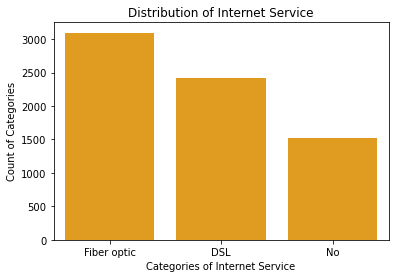

In [49]:
sns.barplot(x,y,color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()

b. Build a histogram for the ‘tenure’ column:

i. Set the number of bins to be 30

ii. Set the color of the bins to be ‘green’

iii. Assign the title ‘Distribution of tenure’

In [52]:
plt.hist(df["tenure"],bins=30,color="green")
plt.title("Distribution of tenure")
plt.show()

c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:

i. Assign the points a color of ‘brown’

ii. Set the x-axis label to ‘Tenure of customer’

iii. Set the y-axis label to ‘Monthly Charges of customer’

iv. Set the title to ‘Tenure vs Monthly Charges’

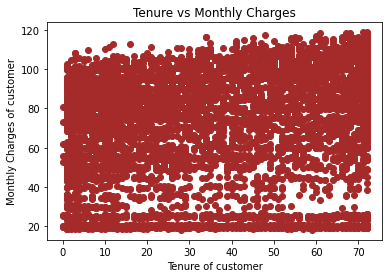

In [53]:
plt.scatter(x = df["tenure"], y=df["MonthlyCharges"],color="brown")
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

In [54]:
plt.scatter(x = df["tenure"].head(50), y=df["MonthlyCharges"].head(50),color="brown")
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

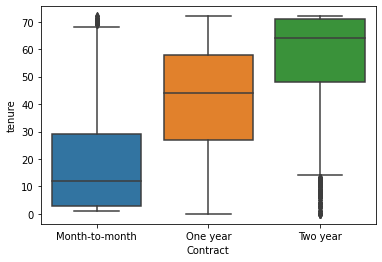

In [55]:
sns.boxplot(x=df["Contract"],y=df["tenure"])

# C) Linear Regression:

a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’

i. Divide the dataset into train and test sets in 70:30 ratio.

ii. Build the model on train set and predict the values on test set

iii. After predicting the values, find the root mean square error

iv. Find out the error in prediction & store the result in ‘error’

v. Find the root mean square error

In [58]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [59]:
x = df.loc[:,["tenure"]].values

In [60]:
x

array([[ 1],
       [34],
       [ 2],
       ...,
       [11],
       [ 4],
       [66]], dtype=int64)

In [61]:
y = df.loc[:,["MonthlyCharges"]].values

In [62]:
y

array([[ 29.85],
       [ 56.95],
       [ 53.85],
       ...,
       [ 29.6 ],
       [ 74.4 ],
       [105.65]])

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lin_reg = LinearRegression()

In [67]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [68]:
y_pred = lin_reg.predict(x_test)

In [69]:
y_pred

array([[60.95089608],
       [72.98096699],
       [59.1903979 ],
       ...,
       [75.62171426],
       [70.63363608],
       [65.6455579 ]])

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
mse = mean_squared_error(y_test,y_pred)

In [72]:
mse

864.0415701364655

In [73]:
rmse = np.sqrt(mse)

In [74]:
rmse

29.394584027273893

D) Logistic Regression:

a. Build a simple logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’

i. Divide the dataset in 65:35 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

In [75]:
x = df.loc[:,["MonthlyCharges"]].values

In [76]:
x

array([[ 29.85],
       [ 56.95],
       [ 53.85],
       ...,
       [ 29.6 ],
       [ 74.4 ],
       [105.65]])

In [79]:
y = df.loc[:,["Churn"]].values

In [80]:
y

array([['No'],
       ['No'],
       ['Yes'],
       ...,
       ['No'],
       ['Yes'],
       ['No']], dtype=object)

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state = 0)

In [82]:
from sklearn.linear_model import LogisticRegression

In [85]:
log_reg = LogisticRegression()

In [86]:
log_reg.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [87]:
y_pred = log_reg.predict(x_test)

In [88]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [90]:
confusion_matrix(y_test,y_pred)

array([[1815,    0],
       [ 651,    0]], dtype=int64)

In [91]:
accuracy_score(y_test,y_pred)

0.7360097323600974

b. Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’

i. Divide the dataset in 80:20 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

In [92]:
x = df.loc[:,["MonthlyCharges","tenure"]]
y = df.loc[:,["Churn"]]

In [93]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 0)

In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [95]:
logreg.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [96]:
y_pred = logreg.predict(x_test)

In [97]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [98]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [99]:
confusion_matrix(y_test,y_pred)

array([[934, 107],
       [212, 156]], dtype=int64)

In [100]:
accuracy_score(y_test,y_pred)

0.7735982966643009

In [1]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

**5. Decision Tree:
● Build a decision tree model where dependent variable is ‘Churn’ and
independent variable is ‘tenure’:
a. Divide the dataset in 80:20 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and calculate the accuracy

In [9]:
x = df[['tenure']]  # Independent variable(s)
y = df['Churn']     # Dependent variable

# Split the dataset into training and testing sets with an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)

print("\nAccuracy:", accuracy)


Confusion Matrix:
[[951  85]
 [257 116]]

Accuracy: 0.7572746628814763


**6. Random Forest:
● Build a Random Forest model where dependent variable is ‘Churn’ and
independent variables are ‘tenure’ and ‘MonthlyCharges’:
a. Divide the dataset in 70:30 ratio
b. Build the model on train set and predict the values on test set
c. Build the confusion matrix and calculate the accuracy

In [12]:
x = df[['tenure', 'MonthlyCharges']]  # Independent variables
y = df['Churn']                       # Dependent variable

# Split the dataset into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)

print("\nAccuracy:", accuracy)


Confusion Matrix:
[[1429  110]
 [ 405  169]]

Accuracy: 0.7562707051585423
